In [33]:

# Dataset Link- https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
test_path=os.path.join('dataset','test')
train_path=os.path.join('dataset','train')
classes=['yes','no']

In [30]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(100,100),classes=classes,batch_size=10)
test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(100,100),classes=classes,batch_size=10, shuffle=False)

Found 234 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


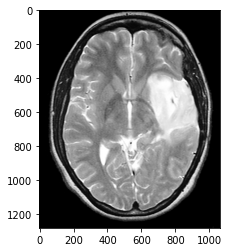

In [34]:
img=plt.imread('dataset/train/yes/Y91.JPG')
plt.imshow(img)

In [35]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [39]:
hist=model.fit(train_batch,epochs=5)

Epoch 1/5
24/24 [==============================] - 1s 22ms/step - loss: 3.2800e-04 - accuracy: 1.0000
Epoch 2/5
24/24 [==============================] - 0s 19ms/step - loss: 2.8729e-04 - accuracy: 1.0000
Epoch 3/5
24/24 [==============================] - 0s 20ms/step - loss: 2.5024e-04 - accuracy: 1.0000
Epoch 4/5
24/24 [==============================] - 0s 18ms/step - loss: 2.2012e-04 - accuracy: 1.0000
Epoch 5/5
24/24 [==============================] - 0s 18ms/step - loss: 1.9739e-04 - accuracy: 1.0000


In [40]:
model.predict(test_batch)

2/2 [==============================] - 0s 21ms/step


array([[9.9999130e-01, 2.2001423e-05],
       [9.9999976e-01, 4.3096975e-07],
       [9.8086941e-01, 3.3583377e-02],
       [3.3718994e-01, 4.1415402e-01],
       [9.0722013e-01, 1.0245449e-01],
       [9.9993145e-01, 3.4852879e-04],
       [9.9974889e-01, 3.9749758e-04],
       [9.9919301e-01, 2.9475035e-03],
       [8.9102989e-01, 6.4772397e-02],
       [1.6011203e-05, 9.9996102e-01],
       [4.0929446e-01, 8.7217736e-01],
       [1.3464803e-03, 9.9860519e-01],
       [9.7124702e-01, 1.3240228e-02],
       [2.8528119e-04, 9.9940550e-01],
       [8.3858247e-08, 9.9999988e-01],
       [6.4333781e-06, 9.9999380e-01],
       [1.5427390e-04, 9.9974281e-01],
       [6.5538028e-05, 9.9993634e-01],
       [4.0929446e-01, 8.7217736e-01]], dtype=float32)